In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

# 데이터 시각화 (Matplotlib) 활용와 왕좌의 게임 데이터 분석

## 1. matplotlib 간단 실습

### 1.1 하나의 그래프 그리기
1.1.1 line graph 그리기

In [2]:
import matplotlib.pyplot as plt

In [11]:
sr = Series([10,20,30,15,25],index=list('abcde'))
sr

a    10
b    20
c    30
d    15
e    25
dtype: int64

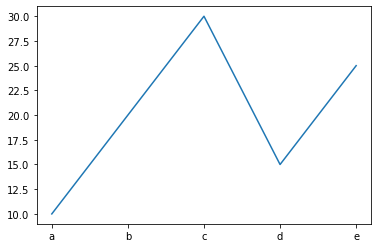

In [12]:
plt.plot(sr) # 라인그래프를 그려주는 함수
# figure : 그래프를 그릴 종이(도화지)
# axes, subplot : 그래프
# plot : 그래프를 그릴 종이를 만들고, axes, subplot으로 그래프를 만들어 그리는 함수

1.1.2 bar graph 그리기

In [8]:
import random
sr2=Series(random.sample(range(100,1000),5),index=list('abcde'))
sr2

a    171
b    988
c    235
d    357
e    701
dtype: int64

<BarContainer object of 5 artists>

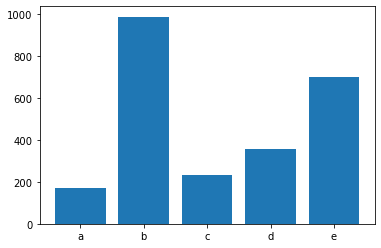

In [10]:
plt.bar(sr2.index,sr2.values)

<AxesSubplot:>

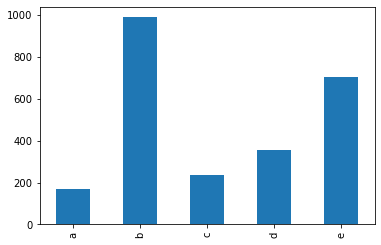

In [13]:
sr2.plot(kind='bar') # 차트의 형태 지정 (ex) bar, scatter)

1.1.3 두 개의 그래프를 하나로 그리기

- <a href = https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.subplots.html> plt.subplots() </a> 함수는 새로운 figure와 axes(subplots)를 생성해 준다.

<BarContainer object of 5 artists>

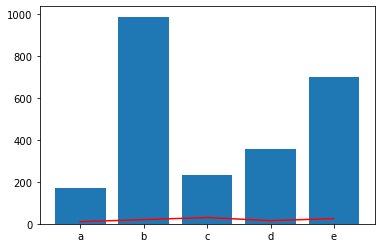

In [21]:
fig,ax=plt.subplots() # 새로운 figure와 그 안에 하나의 axes를 만들어서 반환
ax.plot(sr,color='r')
ax.bar(sr2.index,sr2.values)

1.1.4 두 개 그래프를 서로 다른 y축 적용하기

<BarContainer object of 5 artists>

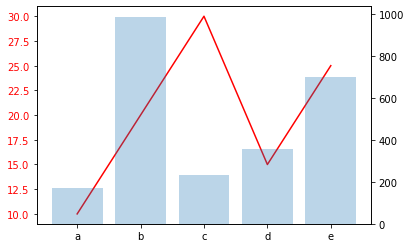

In [25]:
fig,ax=plt.subplots()
ax.plot(sr,color='r')
ax.tick_params(axis='y',labelcolor='r') # y축에 해당하는 축의 색깔 변경
ax2=ax.twinx() # x축을 공유하는  새로운 axes를 생성
ax2.bar(sr2.index,sr2.values,alpha=0.3)

### 1.2. 여러 개 그래프 그리기 
하나의 figure 안에 여러 개의 axes를 그리기

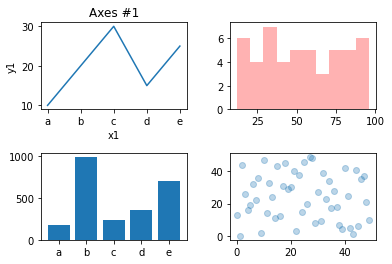

In [37]:
fig,ax_list=plt.subplots(2,2) # 새로운 figure와 2x2형태의 axes list 반환
ax_list[0,0].plot(sr)
ax_list[0,0].set_title('Axes #1')
ax_list[0,0].set_xlabel('x1')
ax_list[0,0].set_ylabel('y1')
ax_list[0,1].hist(random.sample(range(10,100),50), bins = 10, color='r',alpha=0.3)
ax_list[1,0].bar(sr2.index,sr2.values)
ax_list[1,1].scatter(random.sample(range(0,50),50),random.sample(range(0,50),50),alpha=0.3)


plt.subplots_adjust(hspace=0.5,wspace=0.3)

### 1.3. <a href = https://matplotlib.org/3.1.1/tutorials/introductory/usage.html#what-is-a-backend> backend </a> 개념
Matplotlib은 매우 다양한 usecase에 사용되며, 이를 모두 충족시키기 위하여 다양한 backend를 지원함.  
가장 많이 활용하는 옵션은 inline으로, 그래프를 output창에 바로 표현되도록 하는 옵션이며, <strong>%maptlotlib inline</strong>를 실행하여 설정한다. 


%로 시작하는 명령어는 Cell Magic 명령어로써, 파이썬 코드가 아니라 Jupyter에게 특정 기능을 수행하도록 하는 명령이다. 즉, %matplotlib inline 명령은 Jupyter에게 matplotlib 그래프를 출력 영역에 표시할 것을 지시하는 명령이다.

In [39]:
import matplotlib
%matplotlib inline

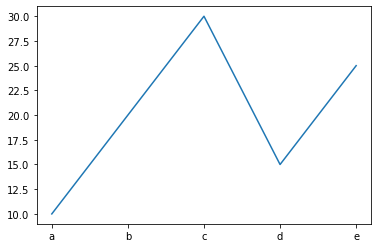

In [40]:
plt.plot(sr)

만약 그래프를 생성한 이후, interactive하게 그래프를 다루고 싶은 경우에는 backend를 interactive backend로 설정하면 된다.  
예를 들어, <strong>%matplotlib nbagg</strong>를 실행하여 <strong>nbagg</strong>으로 설정을 변경할 수 있다.   
보다 다양한 설정 옵션을 확인하려면 <a href = https://matplotlib.org/3.1.1/tutorials/introductory/usage.html#what-is-a-backend> 여기 </a>를 참고하면 된다.  

아래와 같이 nbagg로 설정한 후, 그래프를 생성하면 output 창에 몇몇 버튼과 함께 그래프가 그려진다.  
버튼들을 활용하여 zoon-in, zoom-out이 가능하다.   
그래프를 그린 이후, set_title(), set_xlabel() 함수를 수행하면 현재 그래프에 적용되는 것을 확인할 수 있으며, 오른쪽 상단에 있는 파란색 버튼을 클릭하면 interactive 모드가 종료된다. 

In [45]:
%matplotlib nbagg

<IPython.core.display.Javascript object>


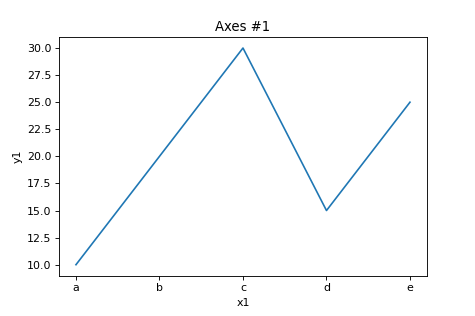

In [48]:
fig,ax=plt.subplots()
ax.plot(sr)

In [49]:
ax.set_title('Axes #1')

Text(0.5, 1.0, 'Axes #1')

In [50]:
ax.set_xlabel('x1')
ax.set_ylabel('y1')

Text(22.66250102221965, 0.5, 'y1')

### 1.4 <a href = https://matplotlib.org/users/customizing.html> matplotlib 설정 변경</a>

<strong> 1.4.1 stylesheet 변경</strong>   
   matplotlib을 통해 데이터 시각화할 때 적용되는 스타일을 변경 가능하며, 사용가능한 스타일시트 목록 및 샘플은 <a href= https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html> 여기 </a>에서 확인 가능하다.

In [51]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [52]:
%matplotlib inline

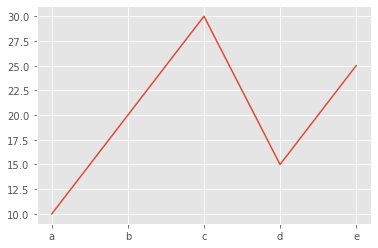

In [53]:
plt.style.use('ggplot')
plt.plot(sr)

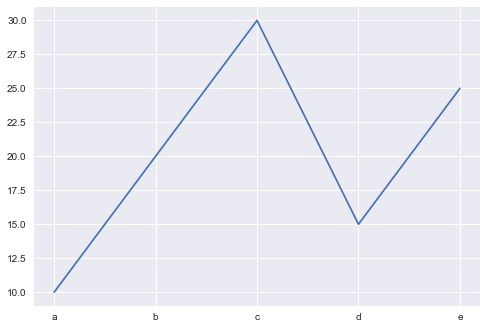

In [54]:
plt.style.use('seaborn')
plt.plot(sr)

1.4.2 <strong> <i> matplotlibrc</i></strong> 파일 수정을 통한 파라미터 수정 
- matplotlibrc 파일을 통해 figure 크기, axes의 폰트사이즈, 색상, 스타일 등 matplotlib의 모든 속성(property)들을 설정 가능하다. 
- 파일을 변경한 후 저장하면, 이후에는 변경된 설정이 계속 사용된다.
- matplotlibrc 파일을 수정한 후에는 jupyter notebook을 재시작해야 수정 내용이 반영된다. 


matplotlibrc 파일의 위치를 찾으려면 matplotlib.matplot.lib_fname()를 수행하면 된다.

In [55]:
matplotlib.matplotlib_fname()

'C:\\anaconda\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

1.4.3 matplotlib.rcParams을 통한 동적 설정 변경

- matplotlib의 설정 정보는 <strong> matplotlib.rcParams</strong>에 저장되어 있으며, rcParams는 <strong><i>사전(Dict)</i></strong> 타입니다.
- rcParams 변경을 통해 동적으로 설정이 변경가능하며, 변경 즉시 반영된다. 

In [56]:
matplotlib.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#EAEAF2',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

In [58]:
matplotlib.rcParams['font.family']='Malgun Gothic'

In [59]:
matplotlib.rcParams['font.family']

['Malgun Gothic']

## 2. <a href=https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html>Pandas의 plot() 함수를 통한 시각화</a>
- pandas의 대표적인 데이터타입인 Series와 DataFrame은 plot() 함수를 제공하며 이를 통해 여러 차트를 그릴 수 있다.   
- 내부적으로는 Series.plot()과 DataFrame.plot() 모두 matplotlib를 사용하며, 파라미터 인자에 따라 적절한 함수가 호출된다.  
- matplotlib은 plot()은 line graph, bar()는 bar graph, hist()는 히스토그램 등 차트의 종류에 따라 다른 함수를 호출해야 하지만, pandas는 차트의 종류에 상관 없이, 차트를 그리는 함수는 plot()이며, kind 인자를 통해 차트의 종류를 설정할 수 있다.   
- matplotlib의 함수들을 직접 사용하는 것보다 사용자 친화적인 인터페이스를 제공하지만, matplotlib의 모든 기능을 제공하지는 않으므로 약간의 불편함은 존재한다.


In [60]:
인구통계 = {'서울': [1053.5, 1023, 987],
        '경기':[1023, 1067, 1123],
        '충청':[512,489,487],
        '경상':[897, 872, 811],
        '전라':[451, 421, 399]
      }
df = DataFrame(인구통계)
df.index = [2018, 2019, 2020]

기본 그리기 - <a href= https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D>line graph</a>

<AxesSubplot:>

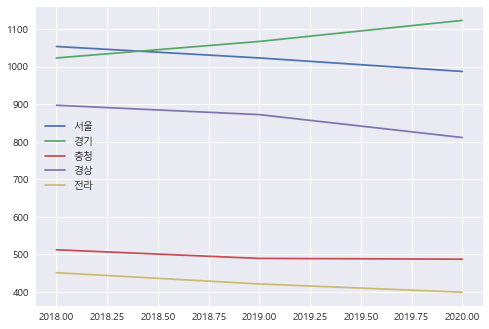

In [62]:
df.plot()

<AxesSubplot:>

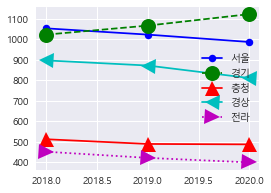

In [66]:
df.plot(style=['b.-','go--','r^-','c<-','m>:'],ms=15,
       figsize=(4,3),
       subplots=False)

<img src="img/예제실습/matplotlib인자.jpg" alt=" matplotlib" style="width: 1200px;"/>

#### 색상: https://matplotlib.org/examples/color/named_colors.html
#### 기타 스타일: https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D

array([<AxesSubplot:title={'center':'서울'}>,
       <AxesSubplot:title={'center':'경기'}>,
       <AxesSubplot:title={'center':'충청'}>,
       <AxesSubplot:title={'center':'경상'}>,
       <AxesSubplot:title={'center':'전라'}>], dtype=object)

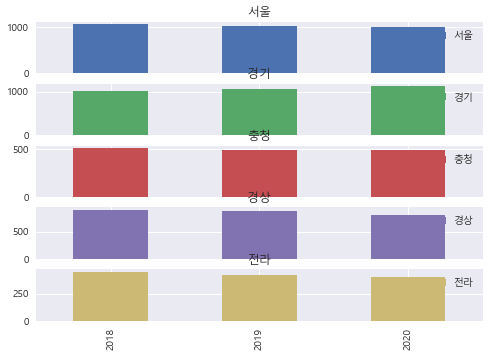

In [68]:
# 실습. 연도별 지역별 인구수 그래프 그리기
df.plot(kind='bar',subplots=True)

## 3. 왕좌의 게임 데이터 분석 및 시각화 실습
#### 1) 데이터 적재
- battless.csv : 전투의 이름, 발생년도, 공격/수비 정보(가문, 왕, 군대 규모 등)을 저장
- deaths.csv : 캐릭터들의 이름, 성별 등 기본 정보와 사망 정보

In [70]:
battles=pd.read_csv('data/data-society-game-of-thrones/battles.csv')
death=pd.read_csv('data/data-society-game-of-thrones/character-deaths.csv')

In [71]:
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [72]:
death.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [75]:
battles.columns, death.columns

(Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
        'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
        'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
        'battle_type', 'major_death', 'major_capture', 'attacker_size',
        'defender_size', 'attacker_commander', 'defender_commander', 'summer',
        'location', 'region', 'note'],
       dtype='object'),
 Index(['Name', 'Allegiances', 'Death Year', 'Book of Death', 'Death Chapter',
        'Book Intro Chapter', 'Gender', 'Nobility', 'GoT', 'CoK', 'SoS', 'FfC',
        'DwD'],
       dtype='object'))

#### 2) 책의 권(Book of Death)별로 사망자 수 추이 시각화

In [77]:
death['Book of Death'].unique()

array([nan,  3.,  5.,  4.,  2.,  1.])

In [81]:
a=death[~death['Book of Death'].isnull() ]

In [83]:
a.head(2)

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1


In [93]:
death_count=[]
for i in range(1,6):
    death_count.append(death[death['Book of Death']==i].count()[0])
    
death_count

[49, 73, 97, 27, 61]

In [95]:
bod=[1,2,3,4,5]
dg = Series(death_count,index=bod)
dg

1    49
2    73
3    97
4    27
5    61
dtype: int64

<BarContainer object of 5 artists>

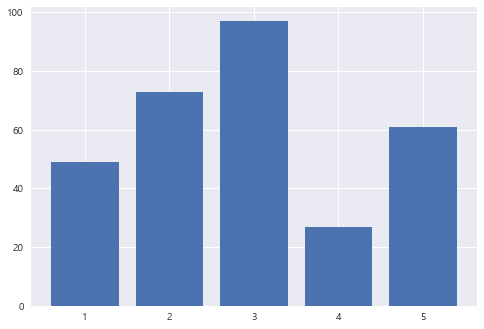

In [100]:
plt.bar(dg.index,dg.values)

In [ ]:
# 교수님 풀이

In [200]:
bookofdeath=death['Book of Death'].value_counts().sort_index()

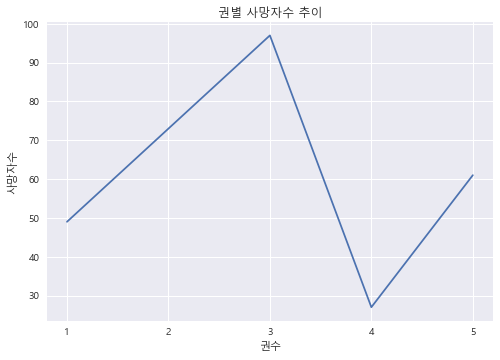

In [206]:
axes1=bookofdeath.plot(xticks=[1,2,3,4,5],
                xlabel='권수',
                ylabel='사망자수',
                title='권별 사망자수 추이')
# 1.5,2.5,3.5,4.5 제거

In [207]:
axes1

<AxesSubplot:title={'center':'권별 사망자수 추이'}, xlabel='권수', ylabel='사망자수'>

In [209]:
axes1.figure.savefig('왕좌의 게임 Book of Death.jpg')

#### 3) 대규모 전투의  공격진영과 수비 진영의 숫자 시각화
대규모 전투 = 공격과 수비 모두 합쳐서 10,000명 이상 참가한 전쟁

In [103]:
battles['war_size']=battles['attacker_size']+battles['defender_size']
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note,war_size
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN,19000.0
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN,25000.0
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN,38000.0
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN,7875.0


In [104]:
bat=battles[battles['war_size']>=10000]
bat.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note,war_size
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN,19000.0
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN,25000.0
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN,38000.0
5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1.0,Riverrun,The Riverlands,NaN,18625.0
14,Battle of Oxcross,299,15,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,6000.0,10000.0,"Robb Stark, Brynden Tully","Stafford Lannister, Roland Crakehall, Antario ...",1.0,Oxcross,The Westerlands,NaN,16000.0


In [116]:
# 공격숫자, 수비숫자 각각 시각화

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

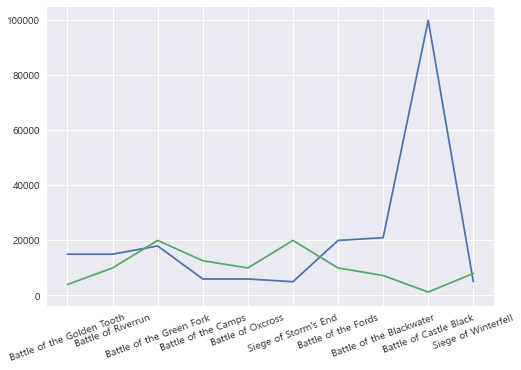

In [113]:
sr=plt.plot(bat['name'],bat['attacker_size'])
sr2=plt.plot(bat['name'],bat['defender_size'])
plt.xticks(rotation=20)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

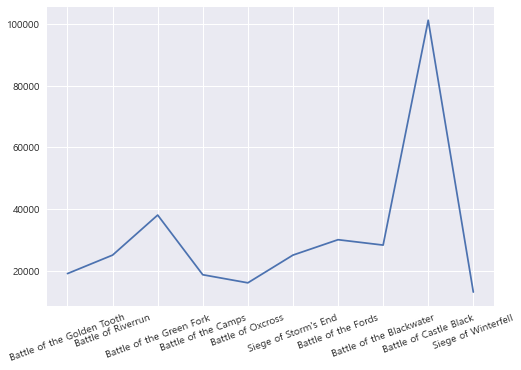

In [118]:
plt.plot(bat['name'],bat['war_size'])
plt.xticks(rotation=20)

In [ ]:
# 교수님풀이

In [ ]:
# 대규모 전투만

In [210]:
big_battles=battles[battles.attacker_size + battles.defender_size >=10000]

<AxesSubplot:ylabel='name'>

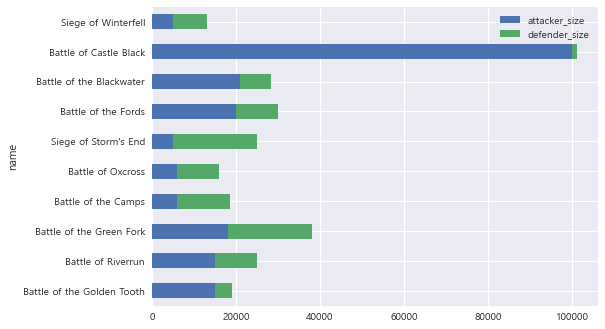

In [216]:
big_battles.plot(x='name',y=['attacker_size','defender_size'],
                kind='barh',stacked=True) # stacked=True로 하면 하나로 합쳐서 보여줌

#### 4) (실습 #1) 가문 별로 전쟁을 참여한 횟수 시각화

In [119]:
battles.columns

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note', 'war_size'],
      dtype='object')

In [159]:
len(battles[(battles['attacker_1']=='Lannister') | (battles['defender_1']=='Lannister')])

17

In [138]:
battlers

[array(['Lannister', 'Stark', 'Greyjoy', 'Bolton', 'Baratheon', 'Darry',
        'Brotherhood without Banners', 'Frey', 'Free folk',
        'Brave Companions', 'Bracken'], dtype=object),
 array(['Tully', 'Baratheon', 'Lannister', 'Darry', 'Stark', 'Greyjoy',
        'Brave Companions', 'Mallister', "Night's Watch", nan, 'Tyrell',
        'Blackwood', 'Bolton'], dtype=object)]

In [145]:
battlers=[]
for i in range(battles['attacker_1'].nunique()):
    battlers.append(battles['attacker_1'].unique()[i])
    
for i in range(battles['defender_1'].nunique()):
    battlers.append(battles['defender_1'].unique()[i])
    
    
battlers=list(set(battlers))

In [161]:
# del battlers[1]
battlers[0]

"Night's Watch"

In [169]:
battlecount=[]
for i in range(len(battlers)):
    battlecount.append(len(battles[(battles['attacker_1']==battlers[i]) | (battles['defender_1']==battlers[i])]))

In [170]:
battlecount

[1, 3, 2, 1, 4, 1, 2, 10, 16, 1, 7, 2, 1, 3, 17, 1]

In [158]:
len(battles[(battles['attacker_1']==battlers[0]) | (battles['defender_1']==battlers[i])].count())

26

In [168]:
len(battlers)

16

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

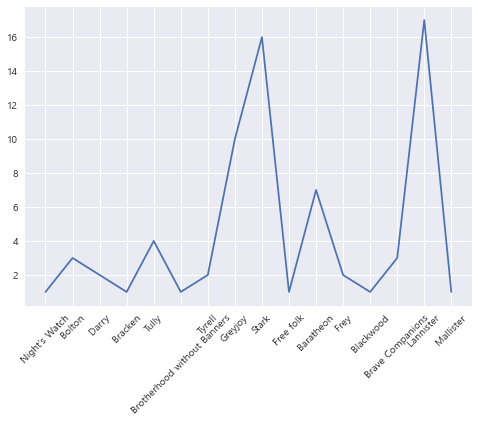

In [194]:
plt.plot(battlers,battlecount)
plt.xticks(rotation=45)

In [ ]:
# 교수님 풀이

In [223]:
# 필요한 칼럼만 선택
# 1. 단순 나열
#battles[['attacker_1','attacker_2','attacker_3','attacker_4','defender_1','defender_2','defender_3','defender_4']]
# 2. loc[]활용
# battles.loc[:,'attacker_1':'defender_4']
# 3. 정규표현식 활용
house=battles.filter(regex='attacker_[1-4]|defender_[1-4]')

In [224]:
house

,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4
0,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN
1,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN
2,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN
3,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN
4,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN
5,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN
6,Lannister,NaN,NaN,NaN,Darry,NaN,NaN,NaN
7,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN
8,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN
9,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN


In [226]:
house.attacker_1.value_counts()

Lannister                      8
Stark                          8
Greyjoy                        7
Baratheon                      6
Bolton                         2
Frey                           2
Darry                          1
Brotherhood without Banners    1
Free folk                      1
Brave Companions               1
Bracken                        1
Name: attacker_1, dtype: int64

In [227]:
# 더해서 누적
house_to_battle_count=Series(dtype='int64')
for col in house.columns:
    house_to_battle_count=house_to_battle_count.add(house[col].value_counts(), fill_value=0)

<AxesSubplot:>

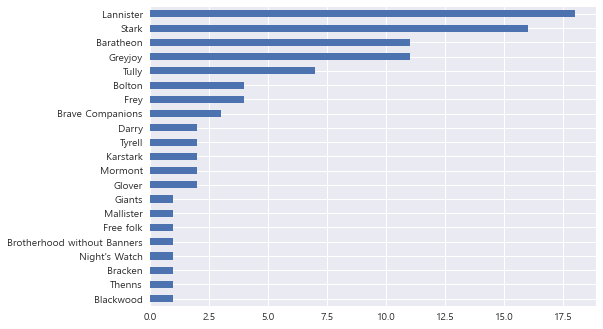

In [232]:
house_to_battle_count.sort_values().plot(kind='barh')

#### 5) (실습 #2) 년도별로 사망자의 숫자와 전쟁이 벌어진 횟수 시각화

In [174]:
death['Death Year'].unique()

array([ nan, 299., 300., 298., 297.])

In [175]:
battles['year'].unique()

array([298, 299, 300], dtype=int64)

In [187]:
years=[297,298,299,300]
deathcount=[]
warcount=[]

for i in range(len(years)):
    deathcount.append(len(death[death['Death Year']==years[i]]))
    warcount.append(len(battles[battles['year']==years[i]]))

In [188]:
deathcount

[3, 46, 156, 100]

In [189]:
warcount

[0, 7, 20, 11]

<AxesSubplot:>

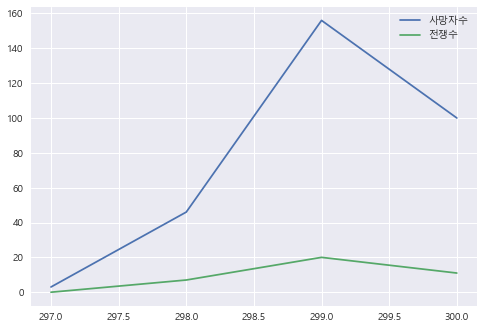

In [192]:
전쟁수={'사망자수':deathcount,
    '전쟁수':warcount}

df=DataFrame(전쟁수)
df.index=[297,298,299,300]
df.plot()

In [233]:
# 교수님 풀이

In [239]:
# 년도별 사망자수
death_for_year=death['Death Year'].value_counts()

In [240]:
# 다른 방법
death.pivot_table(index='Death Year',aggfunc='count',values='Gender')

,Gender
Death Year,
297.0,3
298.0,46
299.0,156
300.0,100


In [241]:
# 년도별 전쟁 횟수
battles_for_year = battles['year'].value_counts()

In [243]:
death_battles_corr=pd.concat([death_for_year,battles_for_year],axis=1)

In [245]:
death_battles_corr.columns = ['# of death','# of battles']

<AxesSubplot:>

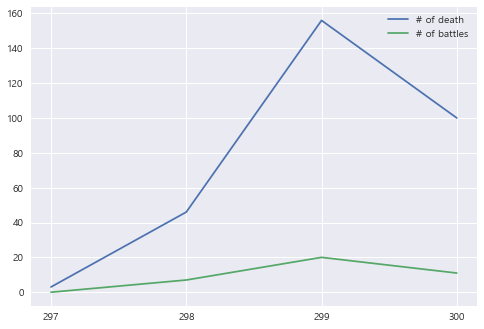

In [249]:
death_battles_corr.fillna(0).plot(xticks=death_battles_corr.index)